In [84]:
import numpy as np
import cv2
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K
from keras.optimizers import SGD
from keras.datasets import mnist
from keras.utils import np_utils
from keras import backend as K
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import fetch_mldata
import matplotlib.pyplot as plt

In [66]:
class LeNet:
    @staticmethod
    def build(width, height, depth, classes):
        model = Sequential()
        inputShape = (width, height, depth)
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
        model.add(Conv2D(20,(5,5), padding="same", input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
        model.add(Conv2D(50,(5,5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))
        model.add(Dense(classes))
        model.add(Activation("softmax"))
        
        return model

In [100]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
if K.image_data_format() == "channels_first":
    X_train = X_test.reshape(X_train.shape[0], 1, 28, 28)
    X_test  = X_test.reshape(X_test.shape[0], 1, 28, 28)
else:
    X_train = X_train.reshape(X_train.shape[0],28, 28, 1)
    X_test  = X_test.reshape(X_test.shape[0],28, 28, 1)
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test  = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
#compile model
opt = SGD(lr=0.01)
model = LeNet.build(width=28, height=28, depth=1, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# train the network
print("[INFO] training network...")
H = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=256, epochs=20, verbose=1)


[INFO] training network...
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 64s 1ms/step - loss: 1.4327 - acc: 0.6474 - val_loss: 0.5323 - val_acc: 0.8379
Epoch 2/20
60000/60000 [==============================] - 62s 1ms/step - loss: 0.3897 - acc: 0.8833 - val_loss: 0.3333 - val_acc: 0.8915
Epoch 3/20
60000/60000 [==============================] - 62s 1ms/step - loss: 0.2668 - acc: 0.9215 - val_loss: 0.2335 - val_acc: 0.9343
Epoch 4/20
60000/60000 [==============================] - 63s 1ms/step - loss: 0.2180 - acc: 0.9358 - val_loss: 0.2004 - val_acc: 0.9409
Epoch 5/20
60000/60000 [==============================] - 61s 1ms/step - loss: 0.1863 - acc: 0.9453 - val_loss: 0.1928 - val_acc: 0.9418
Epoch 6/20
60000/60000 [==============================] - 61s 1ms/step - loss: 0.1633 - acc: 0.9513 - val_loss: 0.1409 - val_acc: 0.9583
Epoch 7/20
60000/60000 [==============================] - 61s 1ms/step - loss: 0.1441 - acc: 0.9575 -

In [101]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(X_test, batch_size=128)
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1),
                            target_names = [str(x) for x in range(10)]))

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.98      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.99      0.96      0.98      1009

   micro avg       0.98      0.98      0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



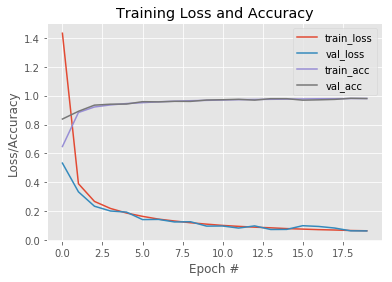

In [102]:
# Plot the training loss and accuracy
epochs = 20
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()